In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mis
import plotly.express as px
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
pwd

'/home/aziz/spaceship-titanic'

In [3]:
os.listdir()

['train.csv',
 '.ipynb_checkpoints',
 'sample_submission.csv',
 'ps.txt',
 'test.csv',
 'Spaceship.ipynb']

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sub = pd.read_csv('sample_submission.csv')

In [5]:
train = df_train.copy()
test = df_test.copy()

In [6]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [7]:
test.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [8]:
df_sub.head()

PassengerId  Transported
0     0013_01        False
1     0018_01        False
2     0019_01        False
3     0021_01        False
4     0023_01        False

In [9]:
print(train.shape)
print(test.shape)

(8693, 14)
(4277, 13)


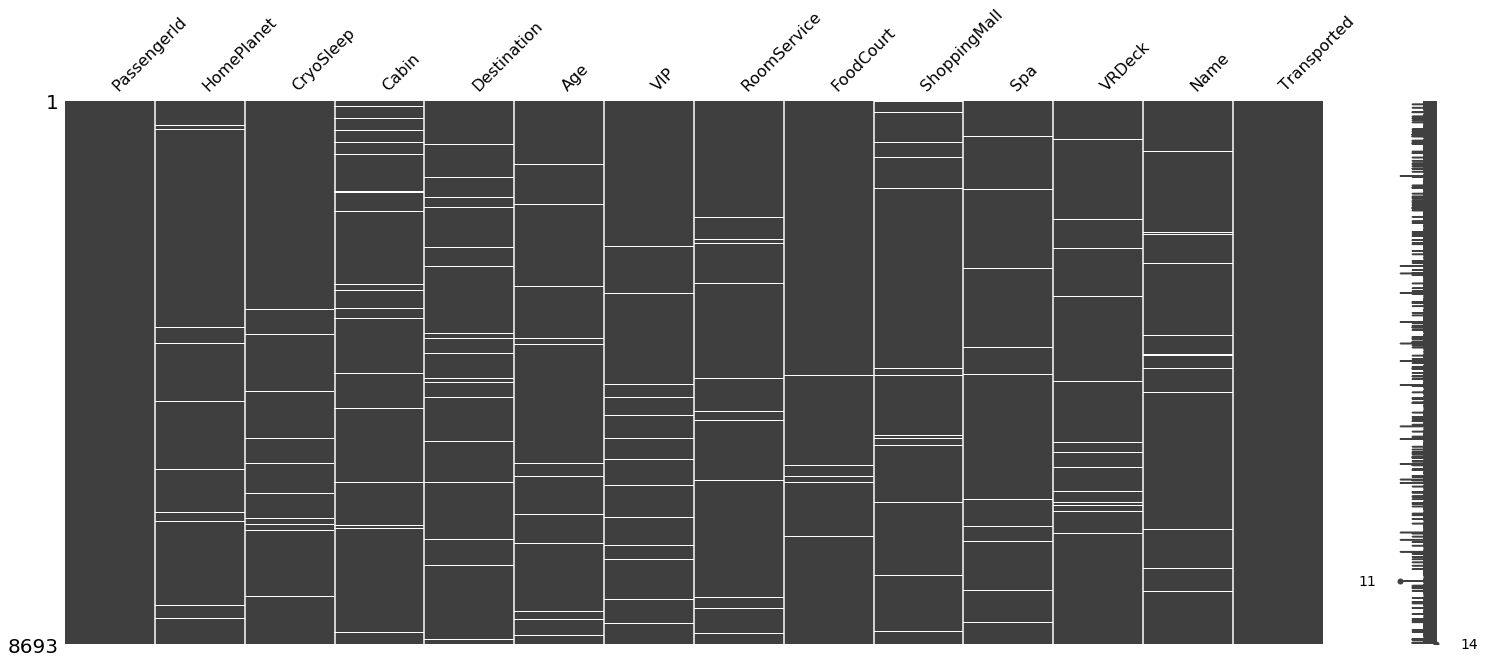

In [10]:
mis.matrix(train)

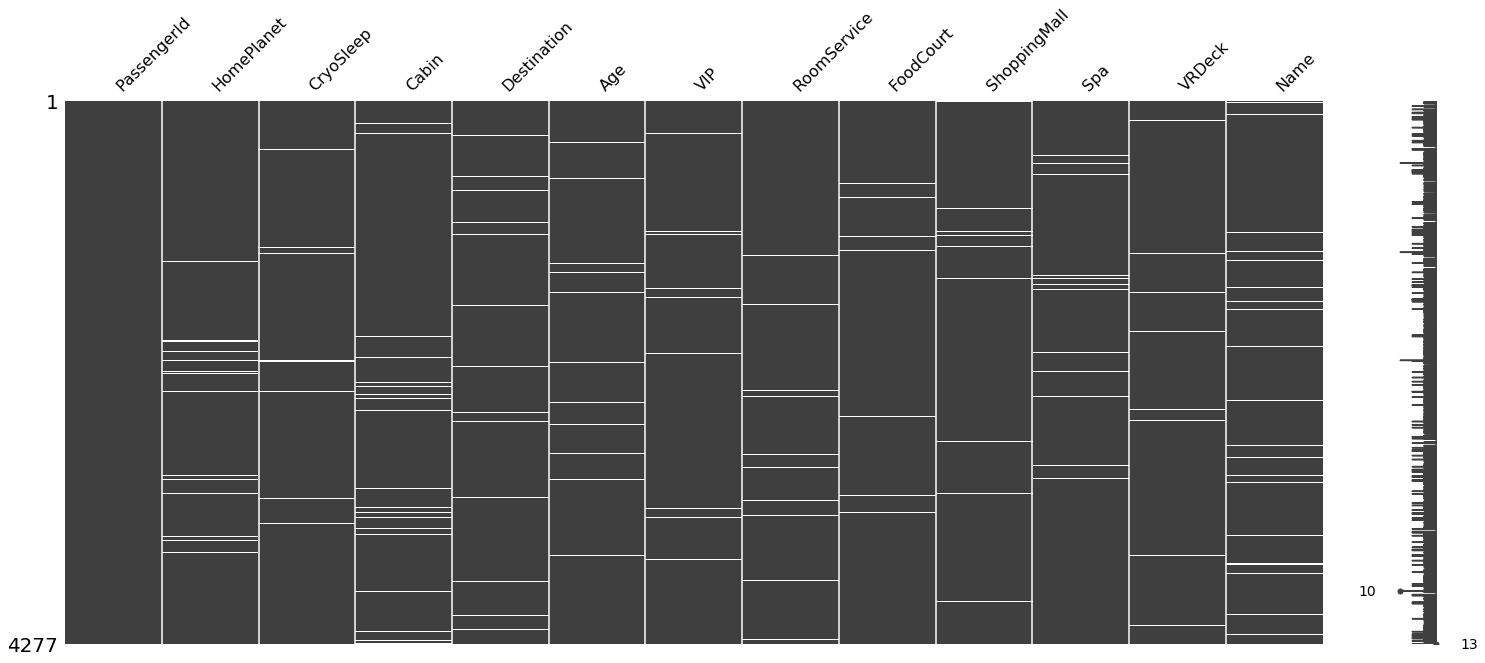

In [11]:
mis.matrix(test)

In [12]:
train.isna().sum().sort_values(ascending = False)/train.shape[0]

CryoSleep       0.024963
ShoppingMall    0.023927
VIP             0.023352
HomePlanet      0.023122
Name            0.023007
Cabin           0.022892
VRDeck          0.021627
Spa             0.021051
FoodCourt       0.021051
Destination     0.020936
RoomService     0.020821
Age             0.020591
Transported     0.000000
PassengerId     0.000000
dtype: float64

In [13]:
test.isna().sum().sort_values(ascending = False)/test.shape[0]

FoodCourt       0.024784
Spa             0.023615
Cabin           0.023381
ShoppingMall    0.022913
Name            0.021978
VIP             0.021744
CryoSleep       0.021744
Destination     0.021510
Age             0.021277
HomePlanet      0.020341
RoomService     0.019172
VRDeck          0.018705
PassengerId     0.000000
dtype: float64

In [14]:
train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [15]:
print('train:',train.duplicated().sum())
print('test:',test.duplicated().sum())

train: 0
test: 0


In [16]:
train.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [17]:
train.describe(include =['object'])

PassengerId HomePlanet CryoSleep    Cabin  Destination    VIP  \
count         8693       8492      8476     8494         8511   8490   
unique        8693          3         2     6560            3      2   
top        0073_01      Earth     False  G/734/S  TRAPPIST-1e  False   
freq             1       4602      5439        8         5915   8291   

                    Name  
count               8493  
unique              8473  
top     Troya Schwardson  
freq                   2

In [18]:
test.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  4186.000000   4195.000000   4171.000000   4179.000000   4176.000000   
mean     28.658146    219.266269    439.484296    177.295525    303.052443   
std      14.179072    607.011289   1527.663045    560.821123   1117.186015   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      26.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     53.000000     78.000000     33.000000     50.000000   
max      79.000000  11567.000000  25273.000000   8292.000000  19844.000000   

             VRDeck  
count   4197.000000  
mean     310.710031  
std     1246.994742  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       36.000000  
max    22272.000000

In [19]:
test.describe(include=['object'])

PassengerId HomePlanet CryoSleep    Cabin  Destination    VIP  \
count         4277       4190      4184     4177         4185   4184   
unique        4277          3         2     3265            3      2   
top        6185_01      Earth     False  G/160/P  TRAPPIST-1e  False   
freq             1       2263      2640        8         2956   4110   

                    Name  
count               4183  
unique              4176  
top     Berta Barnolderg  
freq                   2

In [20]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

# **Exploratory Data Analysis EDA**

In [21]:
train.groupby(['Destination' ,'Transported'])['Transported'].count()

Destination    Transported
55 Cancri e    False           702
               True           1098
PSO J318.5-22  False           395
               True            401
TRAPPIST-1e    False          3128
               True           2787
Name: Transported, dtype: int64

In [22]:
train.groupby(['VIP' ,'ShoppingMall'])['ShoppingMall'].count()

VIP    ShoppingMall
False  0.0             5343
       1.0              143
       2.0               78
       3.0               54
       4.0               41
                       ... 
True   1929.0             1
       2509.0             1
       2974.0             1
       3627.0             1
       3700.0             1
Name: ShoppingMall, Length: 1163, dtype: int64

In [23]:
train['Transported']=train['Transported'].replace(True , 1)
train['Transported']=train['Transported'].replace(False , 0)

In [24]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0          0.0  
1          1.0  
2          0.0  
3          0.0  
4          1.0

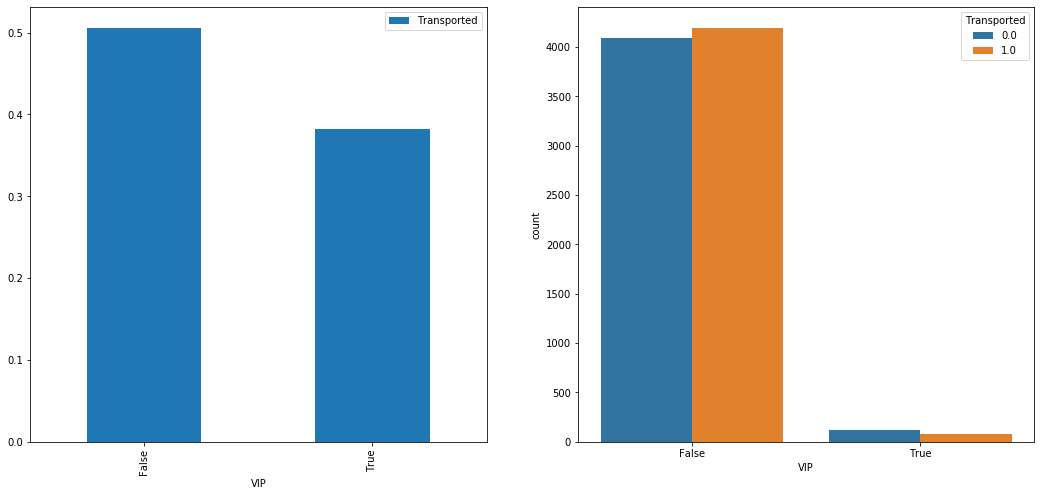

In [25]:
f , ax = plt.subplots(1 ,2,figsize = (18 , 8))
train[['VIP' , 'Transported']].groupby(['VIP']).mean().plot.bar(ax = ax[0])
sns.countplot('VIP' , hue = 'Transported' ,data = train , ax = ax[1])

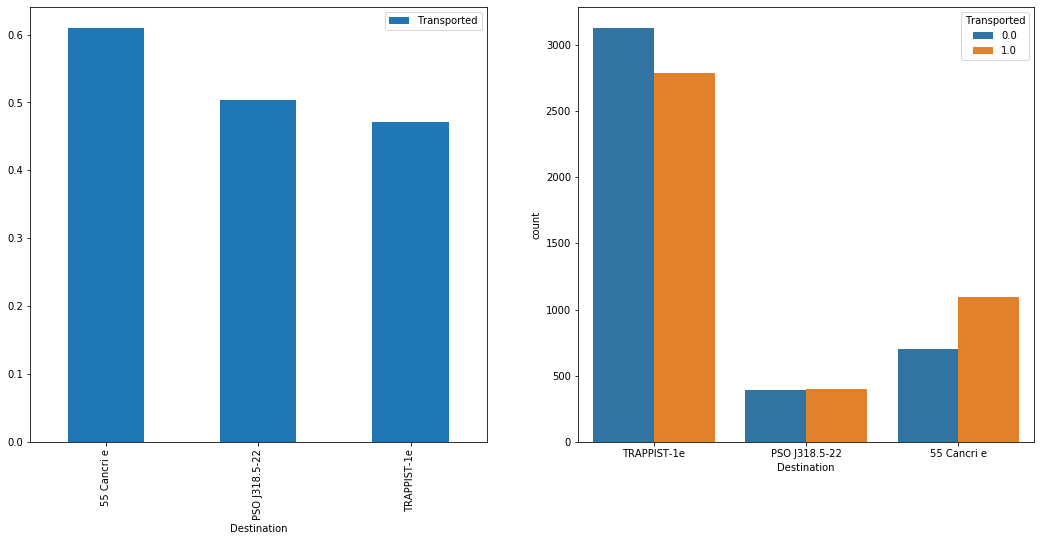

In [26]:
f , ax = plt.subplots(1 ,2,figsize = (18 , 8))
train[['Destination' , 'Transported']].groupby(['Destination']).mean().plot.bar(ax = ax[0])
sns.countplot('Destination' , hue = 'Transported' ,data = train , ax = ax[1])

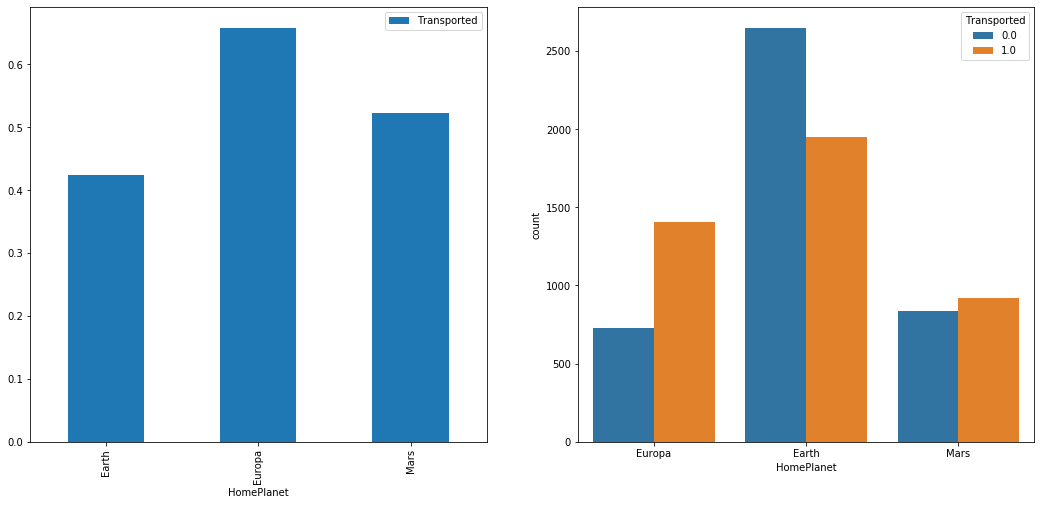

In [27]:
f , ax = plt.subplots(1 ,2,figsize = (18 , 8))
train[['HomePlanet' , 'Transported']].groupby(['HomePlanet']).mean().plot.bar(ax = ax[0])
sns.countplot('HomePlanet' , hue = 'Transported' ,data = train , ax = ax[1])

/home/aziz/ls/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


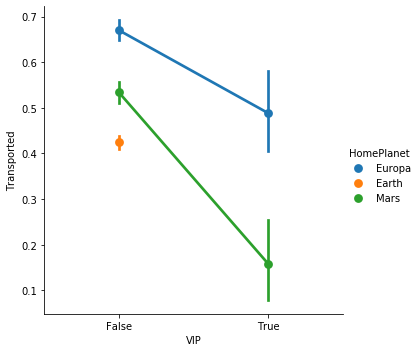

In [28]:
sns.factorplot('VIP' , 'Transported' , 'HomePlanet' ,data = train)

ohh here I'm comfused

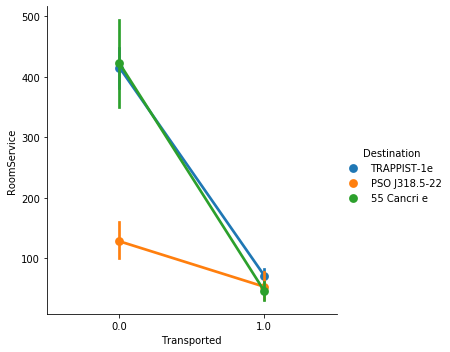

In [29]:
sns.catplot('Transported' , 'RoomService' , 'Destination' , data = train , kind ='point')

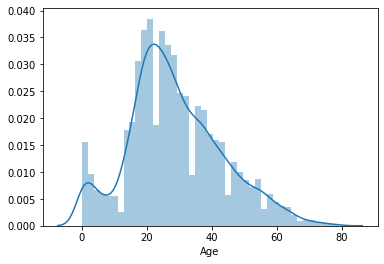

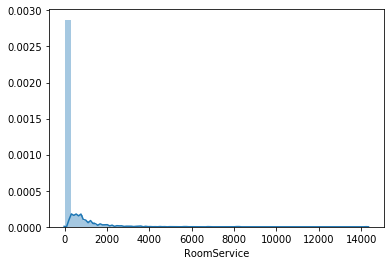

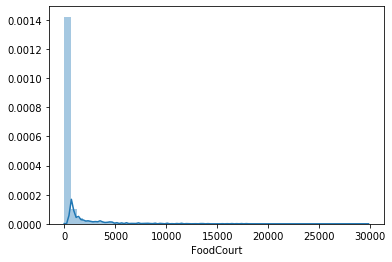

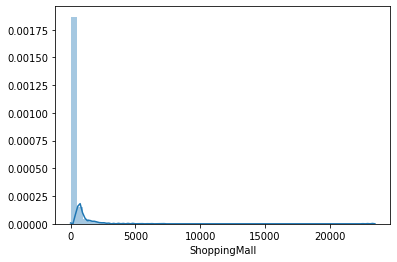

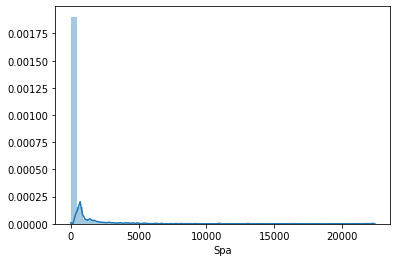

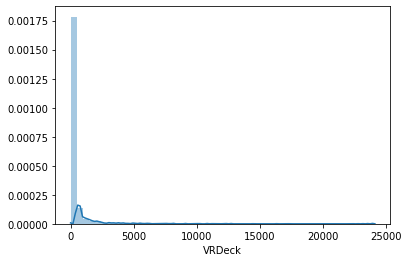

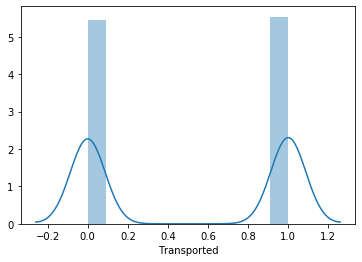

In [30]:
for col in train.select_dtypes('float64'):
    plt.figure()
    sns.distplot(train[col])

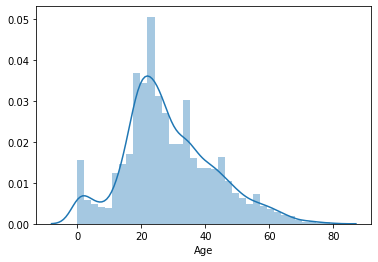

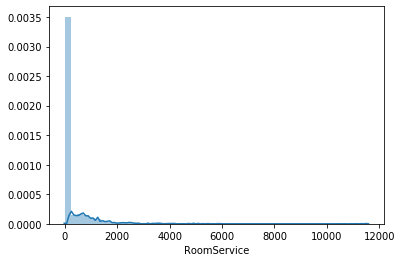

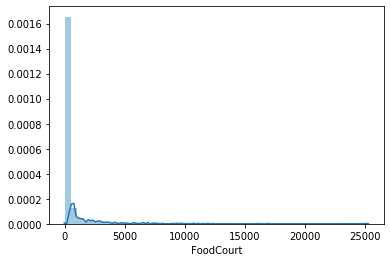

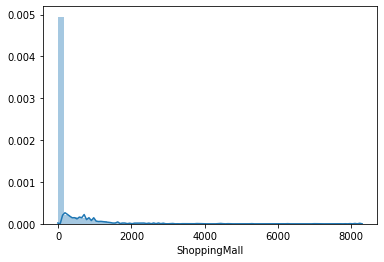

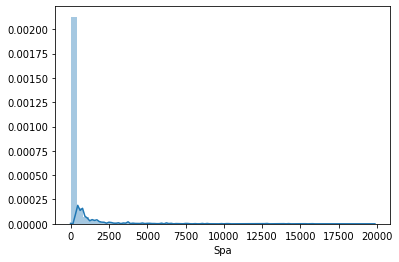

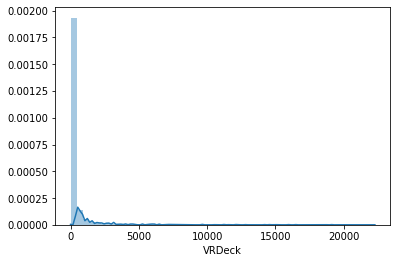

In [31]:
#The Age of the Train dataset is more high than the Test dataset
for col in test.select_dtypes('float64'):
    plt.figure()
    sns.distplot(test[col])

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


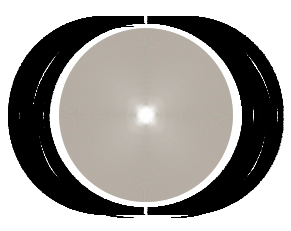

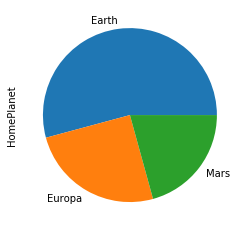

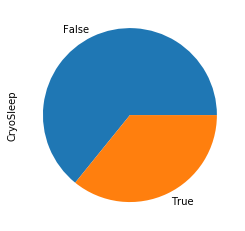

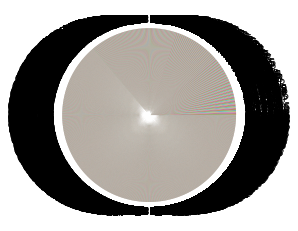

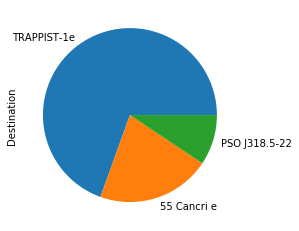

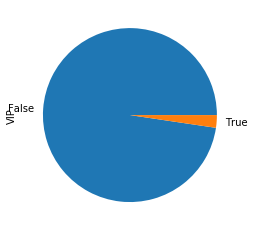

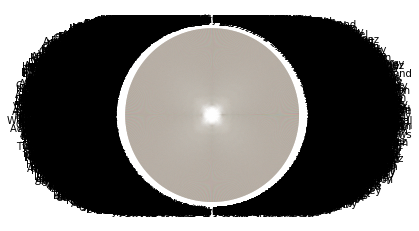

In [32]:
for col in train.select_dtypes('object'):
    plt.figure()
    print(col)
    train[col].value_counts().plot.pie()

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


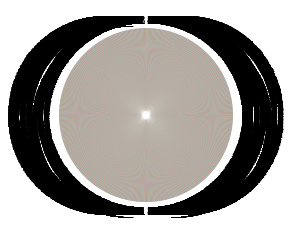

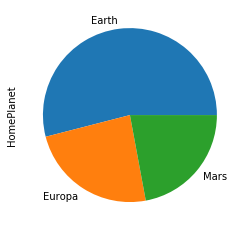

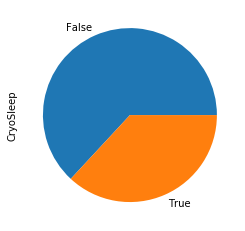

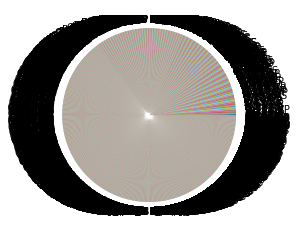

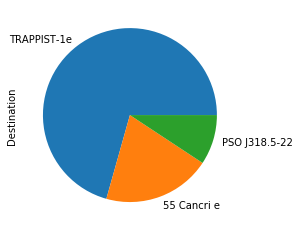

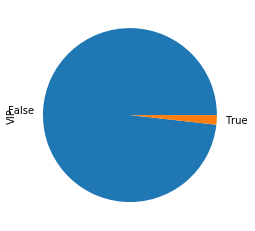

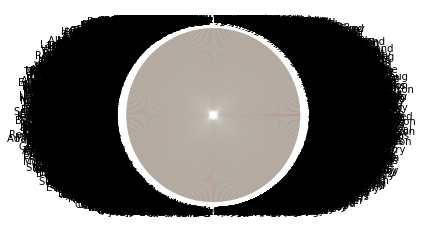

In [33]:
for col in test.select_dtypes('object'):
    plt.figure()
    print(col)
    test[col].value_counts().plot.pie()

In [34]:
train_copy = train.copy()
test_copy = test.copy()
train_copy["color"] = "Train"
test_copy["color"] = "Test"
ageDf = pd.concat([train_copy, test_copy])
fig = px.histogram(data_frame = ageDf, 
                   x="Age",
                   color= "color",
                   color_discrete_sequence =  ['#58D68D','#DE3163'],
                   marginal="box",
                   nbins= 100,
                    template="plotly_white"
                )
fig.update_layout(title = "Distribution of Age" , title_x = 0.5)
fig.show()

In [35]:
print(train['Age'].max())
print(train['Age'].min())

79.0
0.0


In [36]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0          0.0  
1          1.0  
2          0.0  
3          0.0  
4          1.0

In [37]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported     float64
dtype: object

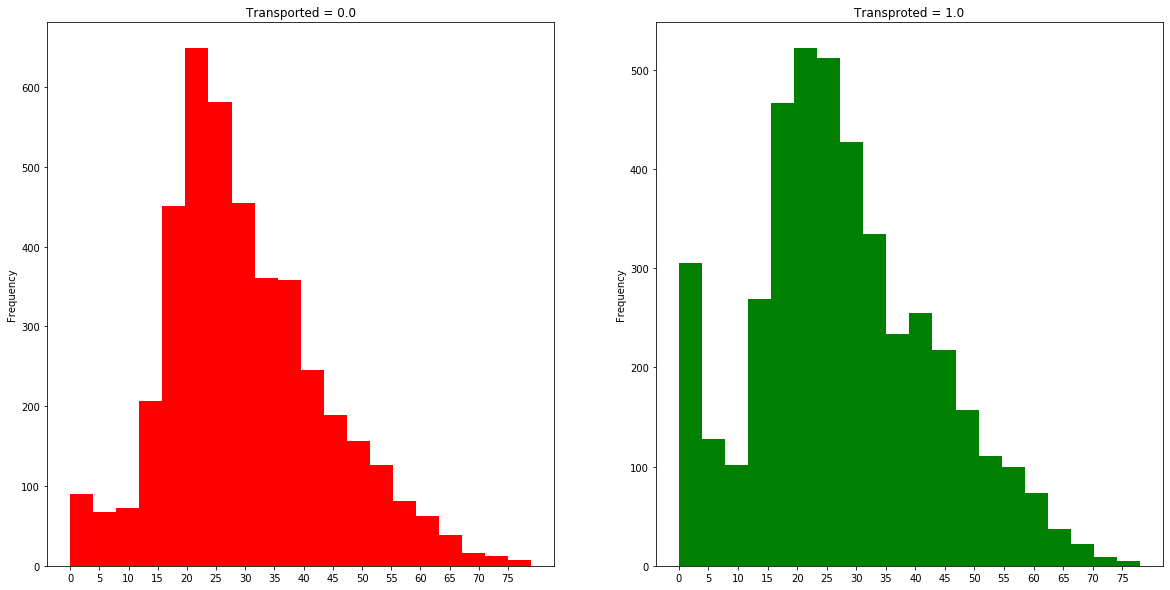

In [38]:
f , ax = plt.subplots(1 , 2 , figsize =(20,10))
train[train['Transported']==0.0].Age.plot.hist(ax = ax[0] , bins = 20 , color = 'red')
ax[0].set_title("Transported = 0.0")
x0 = list(range(0,80,5))
ax[0].set_xticks(x0)
train[train['Transported'] == 1.0].Age.plot.hist(ax =ax[1], bins = 20 , color = "green")
ax[1].set_title("Transproted = 1.0")
x0 = list(range(0,80,5))
ax[1].set_xticks(x0)
plt.show()

In [39]:
train.groupby('Transported')['Age'].mean()

Transported
0.0    29.922858
1.0    27.748834
Name: Age, dtype: float64

In [40]:
train.loc[(train['Age']>=0) &(train['Age']<=7) ,'Age'] = 1
train.loc[(train['Age']>7) &(train['Age']<=14) ,'Age'] = 2
train.loc[(train['Age']>14) &(train['Age']<=21) ,'Age'] = 3
train.loc[(train['Age']>21) &(train['Age']<=28) ,'Age'] = 4
train.loc[(train['Age']>21) &(train['Age']<=28) ,'Age'] = 4
train.loc[(train['Age']>28) &(train['Age']<=35) ,'Age'] = 5
train.loc[(train['Age']>35) &(train['Age']<=42) ,'Age'] = 6
train.loc[(train['Age']>42) &(train['Age']<=49) ,'Age'] = 7
train.loc[(train['Age']>49) &(train['Age']<=56) ,'Age'] = 8
train.loc[(train['Age']>56) &(train['Age']<=63) ,'Age'] = 9
train.loc[(train['Age']>63)&(train['Age']<=70) ,'Age'] = 10
train.loc[(train['Age']>70) &(train['Age']<=79) ,'Age'] = 11

In [41]:
train['Age'].unique()

array([ 6.,  4.,  9.,  5.,  3.,  7.,  2.,  1.,  8., nan, 10., 11.])

In [42]:
test.loc[(test['Age']>=0) &(test['Age']<=7) ,'Age'] = 1
test.loc[(test['Age']>7) &(test['Age']<=14) ,'Age'] = 2
test.loc[(test['Age']>14) &(test['Age']<=21) ,'Age'] = 3
test.loc[(test['Age']>21) &(test['Age']<=28) ,'Age'] = 4
test.loc[(test['Age']>28) &(test['Age']<=35) ,'Age'] = 5
test.loc[(test['Age']>35) &(test['Age']<=42) ,'Age'] = 6
test.loc[(test['Age']>42) &(test['Age']<=49) ,'Age'] = 7
test.loc[(test['Age']>49) &(test['Age']<=56) ,'Age'] = 8
test.loc[(test['Age']>56) &(test['Age']<=63) ,'Age'] = 9
test.loc[(test['Age']>63)&(test['Age']<=70) ,'Age'] = 10
test.loc[(test['Age']>70) &(test['Age']<=79) ,'Age'] = 11

In [43]:
test['Age'].unique()

array([ 4.,  3.,  5.,  6.,  7.,  2., 10.,  1., nan,  8.,  9., 11.])

In [44]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination  Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  6.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  4.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  9.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  5.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  3.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0          0.0  
1          1.0  
2          0.0  
3          0.0  
4          1.0

In [45]:
passengerId_train = train['PassengerId']
passengerId_test = test['PassengerId']


In [46]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination  Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  6.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  4.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  9.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  5.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  3.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0          0.0  
1          1.0  
2          0.0  
3          0.0  
4          1.0

In [47]:
test.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination  Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  4.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  3.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  5.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  6.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  3.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

OR

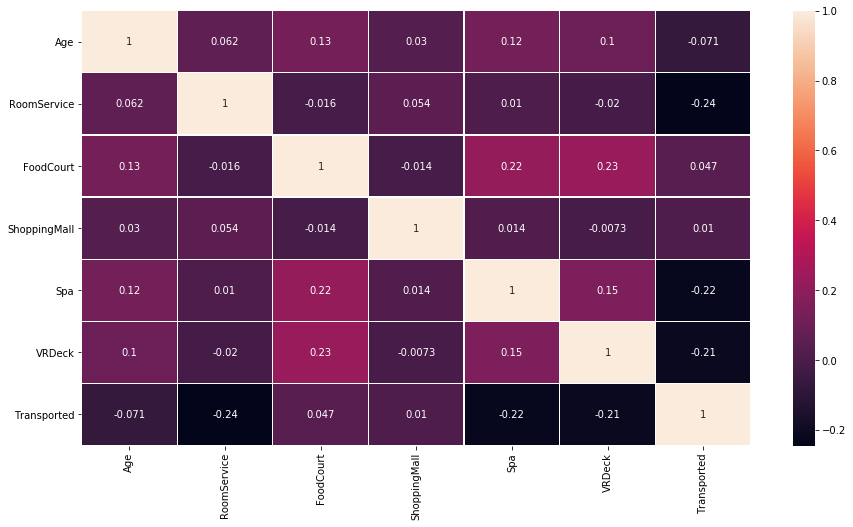

In [48]:
sns.heatmap(train.corr() , annot = True , linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(15 , 8)
plt.show()

In [49]:
fig = px.imshow(train.corr() , text_auto = True , aspect = "auto")
fig.show()

In [50]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination  Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  6.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  4.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  9.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  5.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  3.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0          0.0  
1          1.0  
2          0.0  
3          0.0  
4          1.0

In [51]:
columns=train.columns

In [52]:
encoder = OrdinalEncoder()
def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for column in columns:
    encode(train[column])

/home/aziz/ls/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/aziz/ls/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/aziz/ls/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/aziz/ls/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWa

In [53]:
train

PassengerId HomePlanet CryoSleep Cabin Destination  Age VIP  \
0             0.0          1         0   149           2  5.0   0   
1             1.0          0         0  2184           2  3.0   0   
2             2.0          1         0     1           2  8.0   1   
3             3.0          1         0     1           2  4.0   0   
4             4.0          0         0  2186           2  2.0   0   
...           ...        ...       ...   ...         ...  ...  ..   
8688       8688.0          1         0   146           0  5.0   1   
8689       8689.0          0         1  5280           1  2.0   0   
8690       8690.0          0         0  5285           2  3.0   0   
8691       8691.0          1         0  2131           0  4.0   0   
8692       8692.0          1         0  2131           2  6.0   0   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Name  Transported  
0             0.0        0.0           0.0     0.0     0.0  5252          0.0  
1           109.0        9.0          25.0   456.0    44.0  4502          1.0  
2            43.0     1206.0           0.0  1273.0    49.0   457          0.0  
3             0.0      806.0         332.0  1132.0   187.0  7149          0.0  
4           277.0       69.0         149.0   470.0     2.0  8319          1.0  
...           ...        ...           ...     ...     ...   ...          ...  
8688          0.0     1389.0           0.0   932.0    74.0  3524          0.0  
8689          0.0        0.0           0.0     0.0     0.0  4780          0.0  
8690          0.0        0.0         972.0     1.0     0.0  3002          1.0  
8691          0.0      739.0           0.0   321.0  1113.0  1596          0.0  
8692        124.0     1312.0           0.0     0.0    12.0  6380          1.0  

[8693 rows x 14 columns]

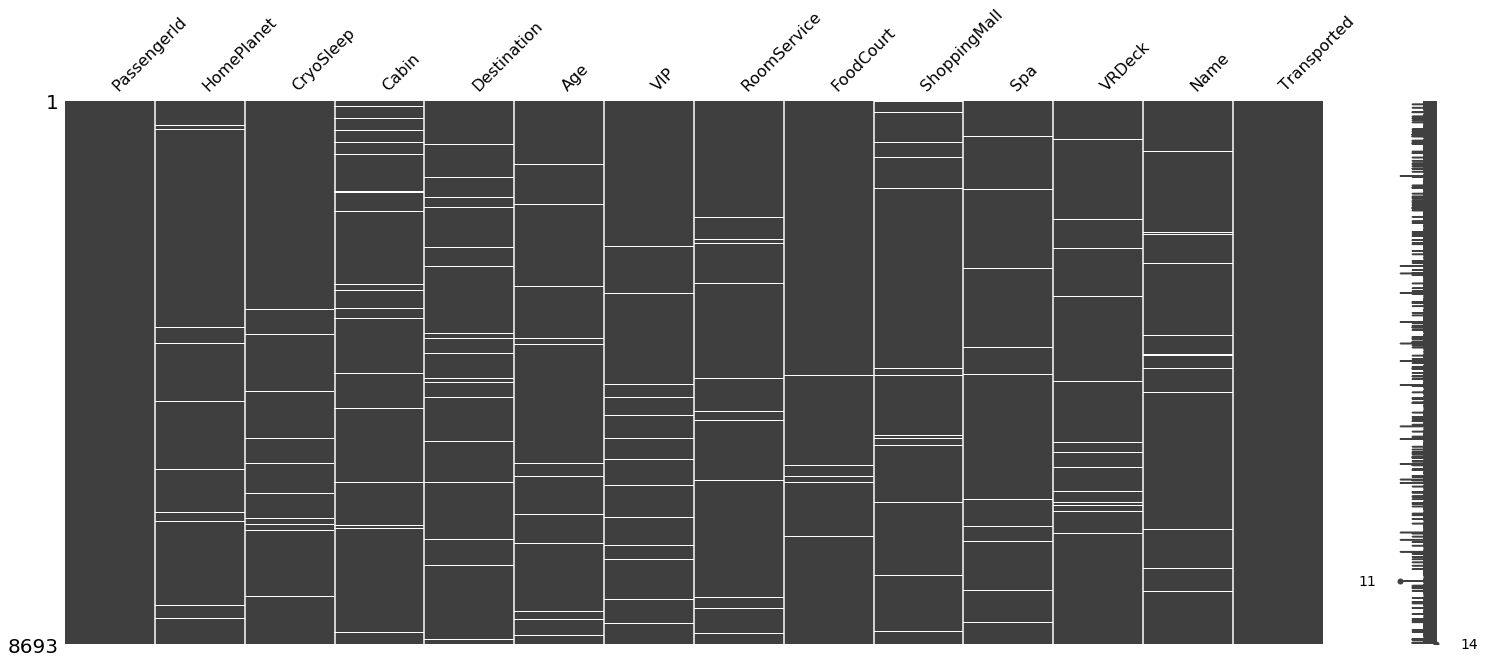

In [54]:
mis.matrix(train)

In [55]:
columns = test.columns
columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [56]:
encoder = OrdinalEncoder()
def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for column in columns:
    encode(test[column])

/home/aziz/ls/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/aziz/ls/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/aziz/ls/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/aziz/ls/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWa

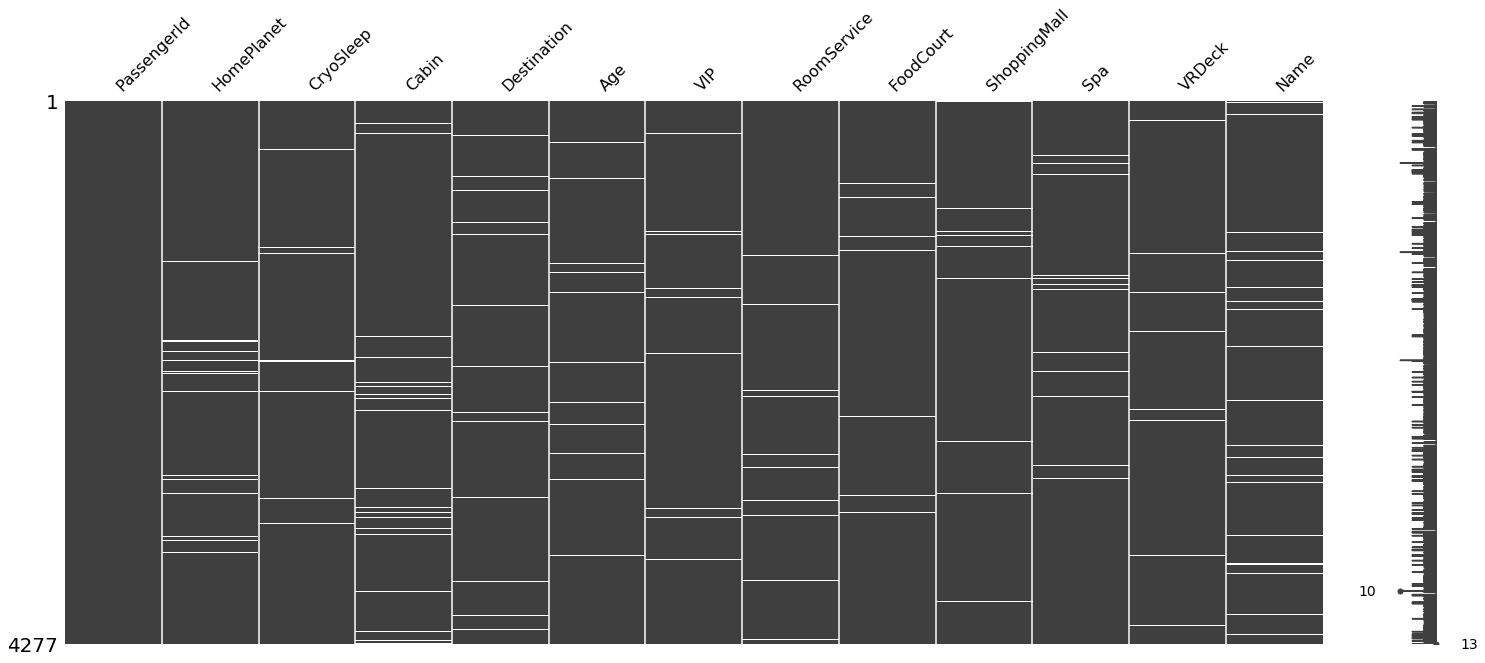

In [57]:
mis.matrix(test)

In [58]:
train.head()

PassengerId HomePlanet CryoSleep Cabin Destination  Age VIP  RoomService  \
0          0.0          1         0   149           2  5.0   0          0.0   
1          1.0          0         0  2184           2  3.0   0        109.0   
2          2.0          1         0     1           2  8.0   1         43.0   
3          3.0          1         0     1           2  4.0   0          0.0   
4          4.0          0         0  2186           2  2.0   0        277.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  Name  Transported  
0        0.0           0.0     0.0     0.0  5252          0.0  
1        9.0          25.0   456.0    44.0  4502          1.0  
2     1206.0           0.0  1273.0    49.0   457          0.0  
3      806.0         332.0  1132.0   187.0  7149          0.0  
4       69.0         149.0   470.0     2.0  8319          1.0

In [59]:
test.head()

PassengerId HomePlanet CryoSleep Cabin Destination  Age VIP  RoomService  \
0          0.0          0         1  2784           2  3.0   0          0.0   
1          1.0          0         0  1867           2  2.0   0          0.0   
2          2.0          1         1   257           0  4.0   0          0.0   
3          3.0          1         0   259           2  5.0   0          0.0   
4          4.0          0         0  1940           2  2.0   0         10.0   

   FoodCourt  ShoppingMall    Spa  VRDeck  Name  
0        0.0           0.0    0.0     0.0  2912  
1        9.0           0.0  724.0     0.0  2406  
2        0.0           0.0    0.0     0.0  3376  
3      843.0           0.0  155.0   359.0  2711  
4        0.0         366.0    0.0     0.0   668

In [60]:
train.drop(columns=['Name'] , inplace = True)
test.drop(columns = ['Name'] , inplace = True)

In [61]:
train.head()

PassengerId HomePlanet CryoSleep Cabin Destination  Age VIP  RoomService  \
0          0.0          1         0   149           2  5.0   0          0.0   
1          1.0          0         0  2184           2  3.0   0        109.0   
2          2.0          1         0     1           2  8.0   1         43.0   
3          3.0          1         0     1           2  4.0   0          0.0   
4          4.0          0         0  2186           2  2.0   0        277.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0        0.0           0.0     0.0     0.0          0.0  
1        9.0          25.0   456.0    44.0          1.0  
2     1206.0           0.0  1273.0    49.0          0.0  
3      806.0         332.0  1132.0   187.0          0.0  
4       69.0         149.0   470.0     2.0          1.0

In [62]:
test

PassengerId HomePlanet CryoSleep Cabin Destination  Age VIP  \
0             0.0          0         1  2784           2  3.0   0   
1             1.0          0         0  1867           2  2.0   0   
2             2.0          1         1   257           0  4.0   0   
3             3.0          1         0   259           2  5.0   0   
4             4.0          0         0  1940           2  2.0   0   
...           ...        ...       ...   ...         ...  ...  ..   
4272       4272.0          0         1  2679           2  4.0   0   
4273       4273.0          0         0   NaN           2  5.0   0   
4274       4274.0          2         1   602           0  NaN   0   
4275       4275.0          1         0   603         NaN  NaN   0   
4276       4276.0          0         1  2680           1  6.0   0   

      RoomService  FoodCourt  ShoppingMall    Spa  VRDeck  
0             0.0        0.0           0.0    0.0     0.0  
1             0.0        9.0           0.0  724.0     0.0  
2             0.0        0.0           0.0    0.0     0.0  
3             0.0      843.0           0.0  155.0   359.0  
4            10.0        0.0         366.0    0.0     0.0  
...           ...        ...           ...    ...     ...  
4272          0.0        0.0           0.0    0.0     0.0  
4273          0.0      468.0          17.0   10.0   131.0  
4274          0.0        0.0           0.0    0.0     0.0  
4275          0.0      712.0           0.0    0.0   334.0  
4276          0.0        0.0           0.0    0.0     0.0  

[4277 rows x 12 columns]

HomePlanet
CryoSleep
Cabin
Destination
VIP


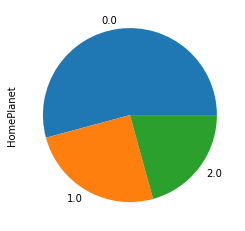

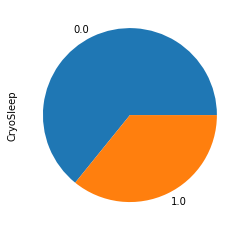

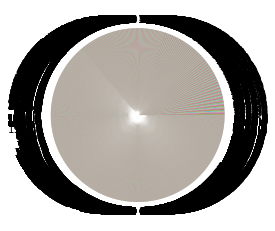

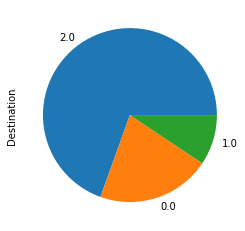

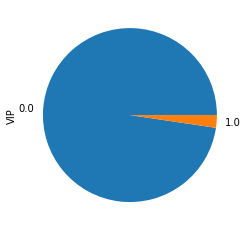

In [63]:
for col in train.select_dtypes('object'):
    plt.figure()
    print(col)
    train[col].value_counts().plot.pie()

In [64]:
train['VIP'] = train['VIP'].fillna(0.0)
test['VIP'] = test['VIP'].fillna(0.0)

In [65]:
train.head()

PassengerId HomePlanet CryoSleep Cabin Destination  Age  VIP  RoomService  \
0          0.0          1         0   149           2  5.0  0.0          0.0   
1          1.0          0         0  2184           2  3.0  0.0        109.0   
2          2.0          1         0     1           2  8.0  1.0         43.0   
3          3.0          1         0     1           2  4.0  0.0          0.0   
4          4.0          0         0  2186           2  2.0  0.0        277.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0        0.0           0.0     0.0     0.0          0.0  
1        9.0          25.0   456.0    44.0          1.0  
2     1206.0           0.0  1273.0    49.0          0.0  
3      806.0         332.0  1132.0   187.0          0.0  
4       69.0         149.0   470.0     2.0          1.0

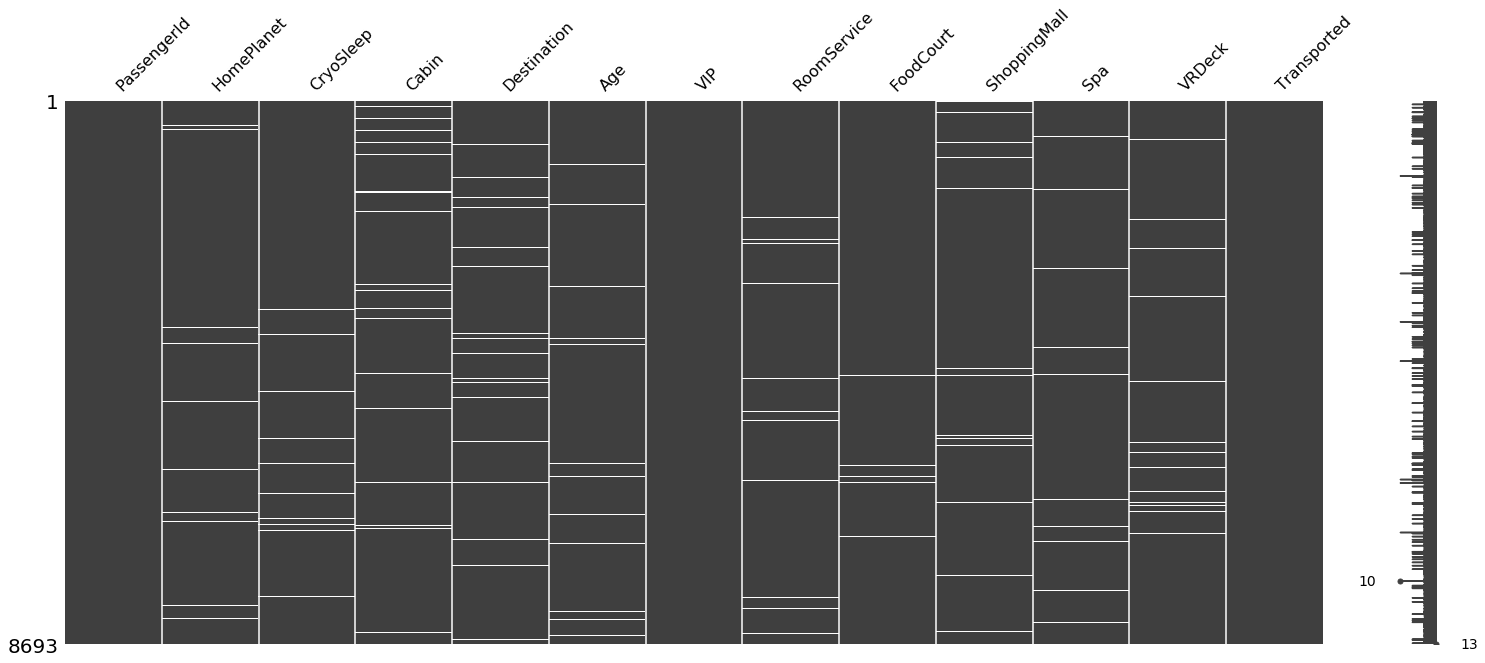

In [66]:
mis.matrix(train)

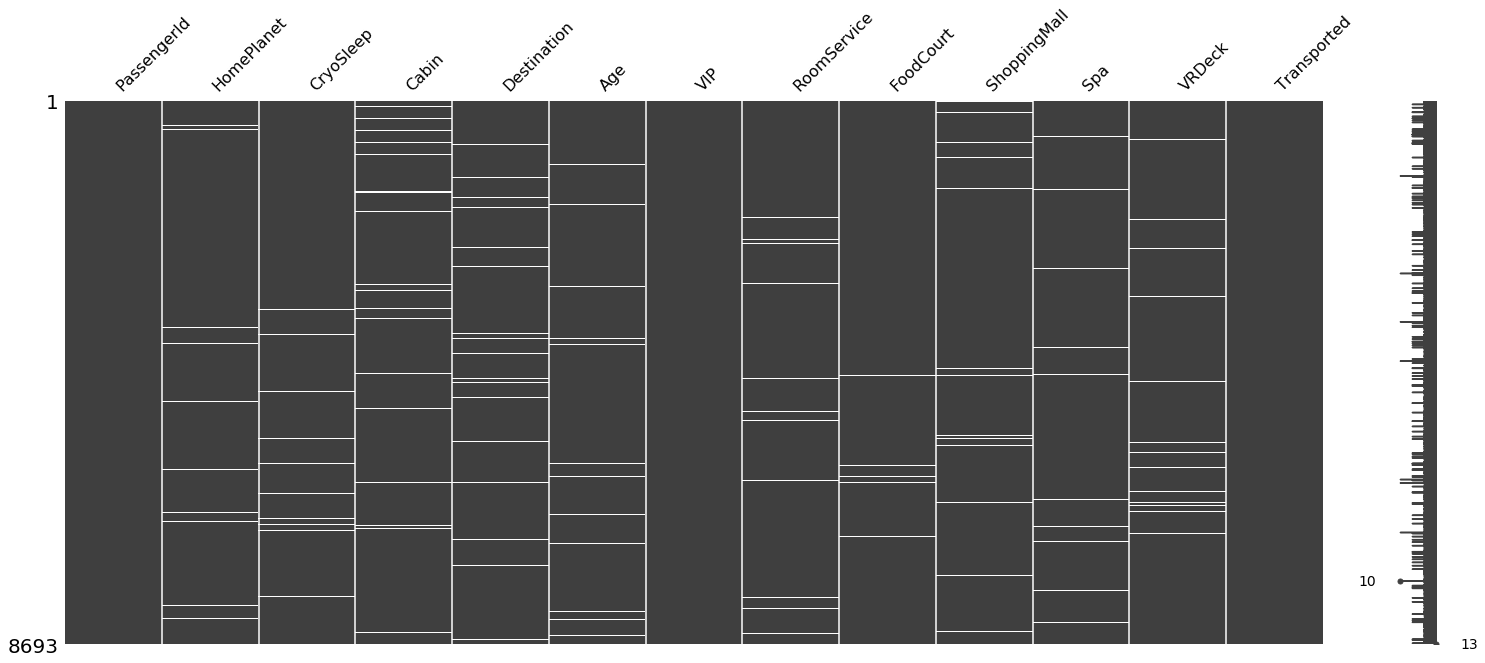

In [67]:
mis.matrix(train)

In [68]:
train.select_dtypes('O').columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination'], dtype='object')

In [69]:
train.dtypes

PassengerId     float64
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported     float64
dtype: object

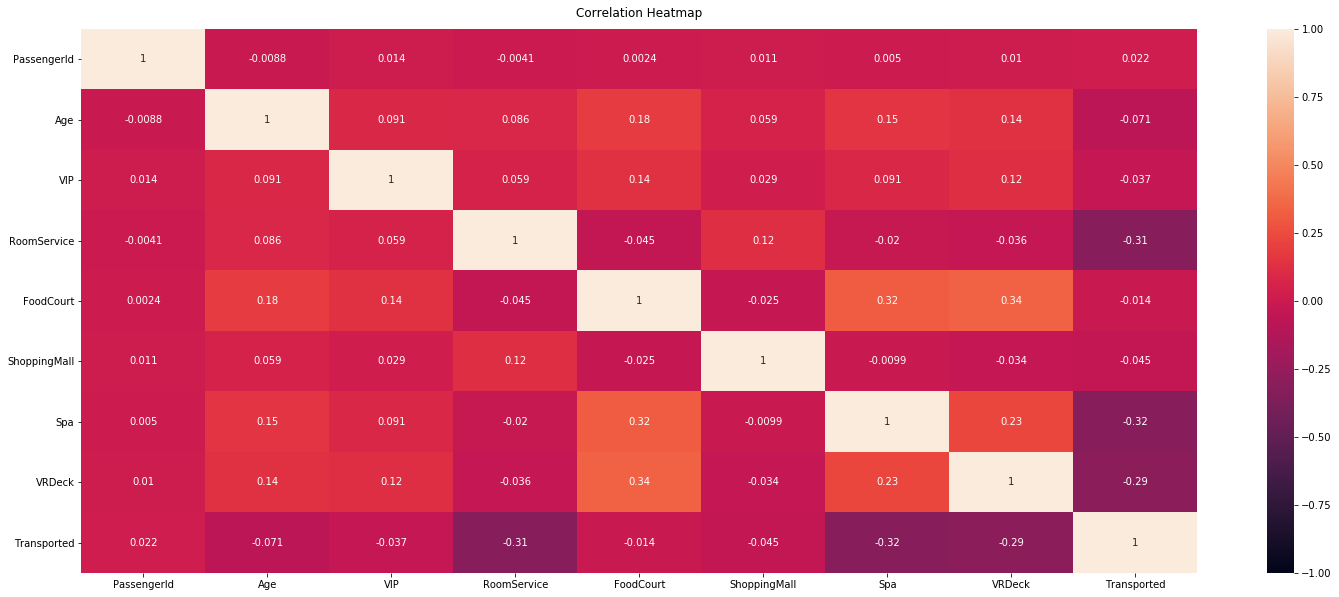

In [70]:
# Increase the size of the heatmap.
plt.figure(figsize=(25, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


# Data preprocessing 

In [71]:
train['HomePlanet'].mode()

0    0
dtype: object

In [72]:
train.drop(columns=['Cabin'] , inplace = True)
test.drop(columns=['Cabin'] , inplace = True)

In [73]:
#fill the missing data
train['HomePlanet'].fillna(train['HomePlanet'].mode()[0], inplace=True)
train['CryoSleep'].fillna(train['CryoSleep'].mode()[0], inplace=True)
train['Destination'].fillna(train['Destination'].mode()[0], inplace=True)
test['HomePlanet'].fillna(test['HomePlanet'].mode()[0], inplace=True)
test['CryoSleep'].fillna(test['CryoSleep'].mode()[0], inplace=True)
test['Destination'].fillna(test['Destination'].mode()[0], inplace=True)
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy='mean' )
imputer.fit(train[imputer_cols])
train[imputer_cols] = imputer.transform(train[imputer_cols])
test[imputer_cols] = imputer.transform(test[imputer_cols])

In [74]:
train["HomePlanet"].fillna(0.0, inplace=True)
test["HomePlanet"].fillna(0.0, inplace=True)

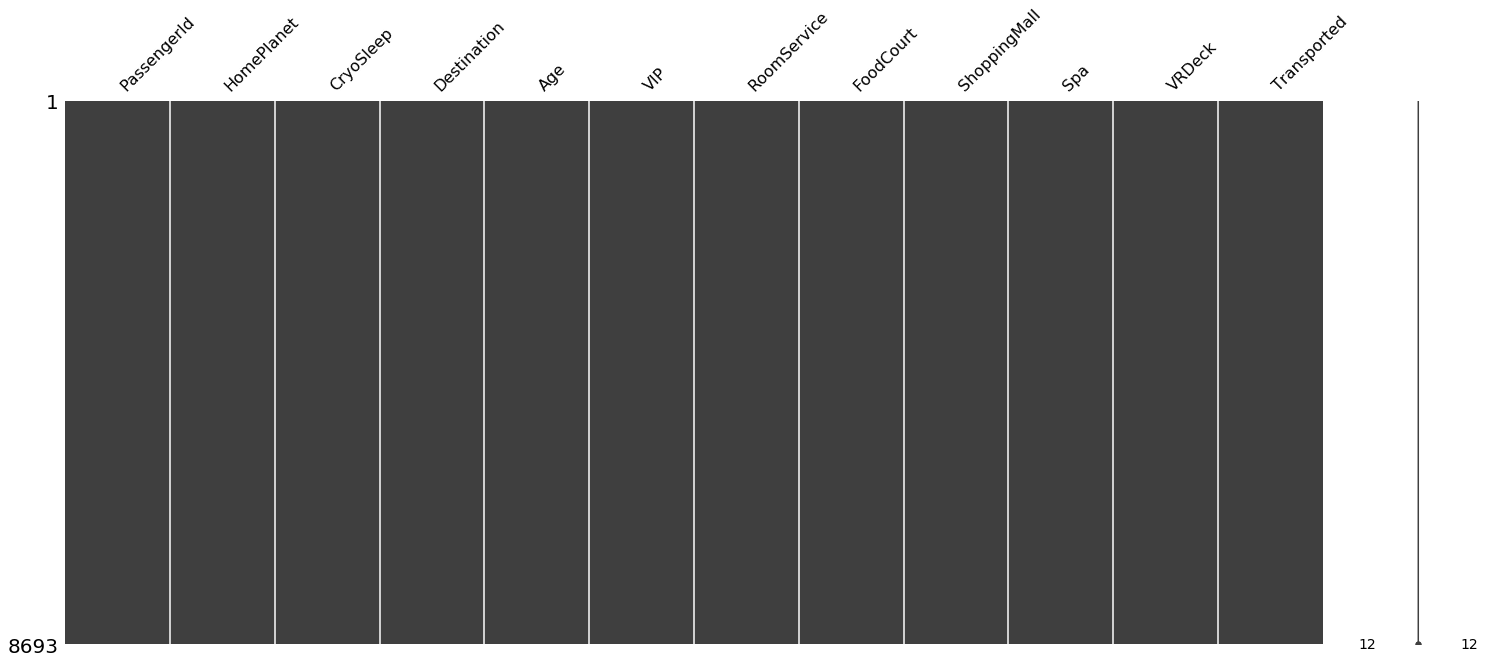

In [75]:
mis.matrix(train)

In [76]:
train.dtypes

PassengerId     float64
HomePlanet      float64
CryoSleep       float64
Destination     float64
Age             float64
VIP             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported     float64
dtype: object

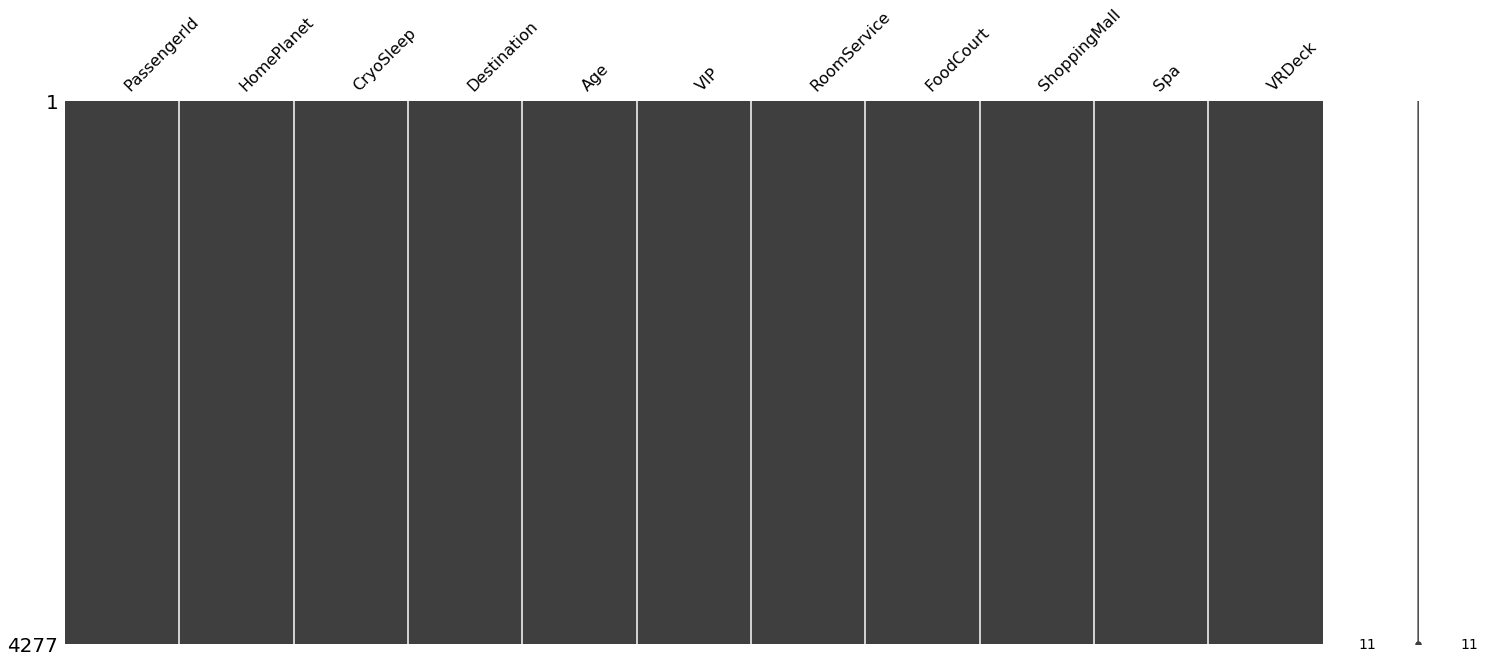

In [77]:
mis.matrix(test)

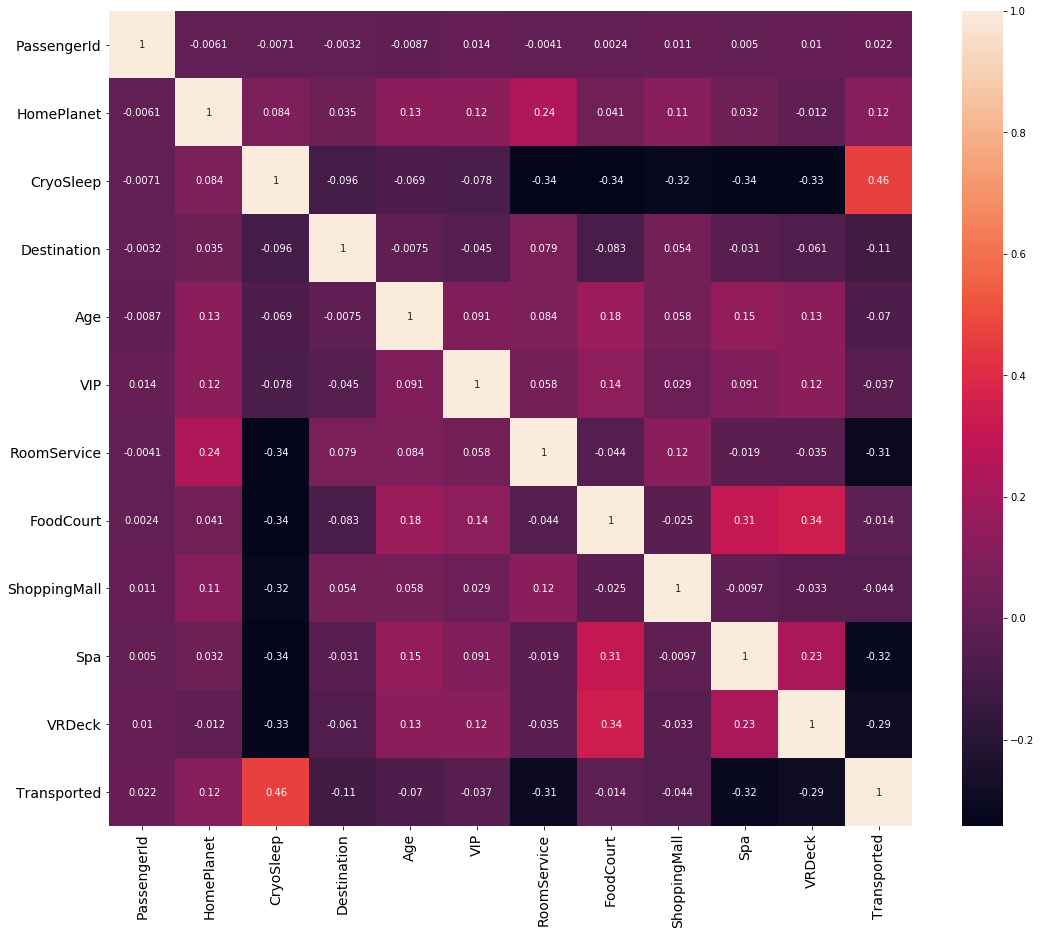

In [78]:
sns.heatmap(train.corr() , annot = True)
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [79]:
x_train , x_test , y_train , y_test = train_test_split(train.drop(columns=['Transported']) , train['Transported'] , test_size = 0.2  , random_state = 19)

# Radia Support Vector Machines (rbf-SVM)

In [80]:
model = svm.SVC(kernel = 'rbf' , C=1 , gamma = 0.1)
model.fit(x_train , y_train)
print('training :',model.score(x_train , y_train))
print('testing :',model.score(x_test , y_test))

training : 0.9923784872016106
testing : 0.6486486486486487


# Linear Support Vector Machine(linear-SVM)

In [81]:
model = svm.SVC(kernel = 'linear' , C=0.1 , gamma = 0.1)
model.fit(x_train , y_train)
print('training :',model.score(x_train , y_train))
print('testing :',model.score(x_test , y_test))

training : 0.7858786310037389
testing : 0.7809085681426107


# Decision Tree


In [82]:
model =DecisionTreeClassifier()
model.fit(x_train , y_train)
print('training :',model.score(x_train , y_train))
print('testing :',model.score(x_test , y_test))

training : 1.0
testing : 0.7193789534215066


# Kneighbors Classifier

In [83]:
model = KNeighborsClassifier()
model.fit(x_train , y_train)
print('training :',model.score(x_train , y_train))
print('testing :',model.score(x_test , y_test))

training : 0.8212539545585275
testing : 0.7607820586543991


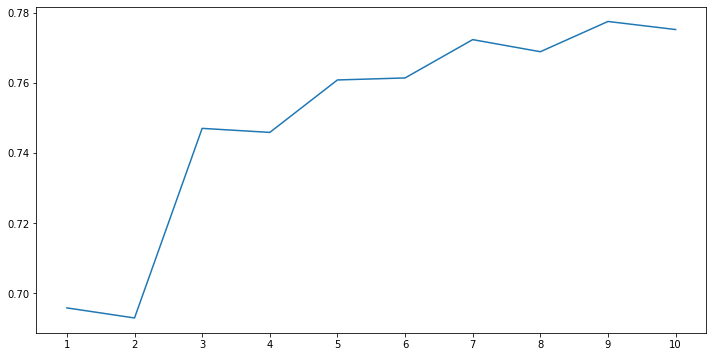

In [84]:
a = list(range(1,11))
df = []
for i in list(range(1,11)):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train , y_train)
  df.append(model.score(x_test , y_test))
b = [1,2,3,4,5,6,7,8,9,10]
plt.plot(a , df)
plt.xticks(b)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [85]:
model = KNeighborsClassifier(n_neighbors = 30)
model.fit(x_train , y_train)
print('training :',model.score(x_train , y_train))
print('testing :',model.score(x_test , y_test))

training : 0.7886108714408974
testing : 0.7849338700402531


# Random Forest Classifier

In [86]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train , y_train)
print('training :',model.score(x_train , y_train))
print('testing :',model.score(x_test , y_test))

training : 0.9998561978717285
testing : 0.7763082231167338


# Cross validation

In [88]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,x_train,y_train, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

CV Mean       Std
Linear Svm     0.780849  0.009442
Radial Svm     0.771645  0.016751
KNN            0.768052  0.013468
Decision Tree  0.716428  0.017245
Naive Bayes    0.758703  0.016987
Random Forest  0.770783  0.013289

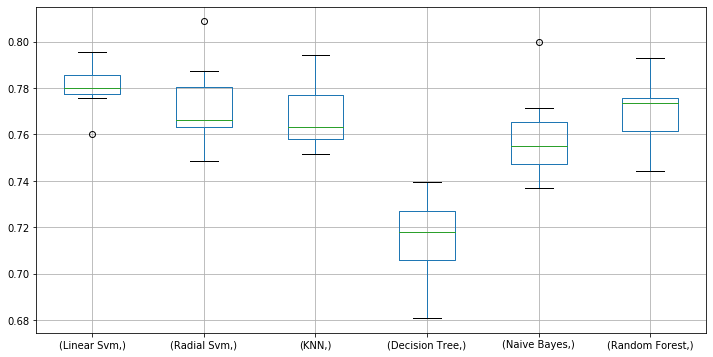

In [89]:
plt.subplots(figsize = (12 , 6))
box = pd.DataFrame(accuracy , index = [classifiers])
box.T.boxplot()

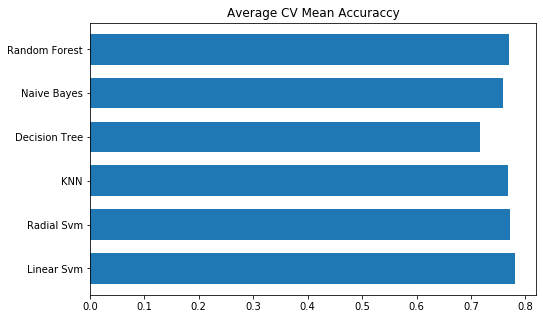

In [90]:
new_models_dataframe2['CV Mean'].plot.barh(width = 0.7)
plt.title('Average CV Mean Accuraccy')
fig = plt.gcf()
fig.set_size_inches(8 , 5)
plt.show()

In [ ]:
f,ax=plt.subplots(3,2,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(DecisionTreeClassifier(),x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

# Hyper-Parameters


## svm

In [ ]:
from sklearn.model_selection import GridSearchCV
C = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

kernel = ["rbf" ,  "linear"]
hyper =  {"kernel":kernel , "C":C , "gamma":gamma}
gd = GridSearchCV(estimator = svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(x_train , y_train)
print(gd.best_score_)
print(gd.best_estimator_)

## RandomForestClassifier

In [ ]:
n_estimators = range(100 ,1000 ,100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=19),param_grid=hyper ,verbose = True)
gd.fit(x_train , y_train)
print(gd.best_score_)
print(gd.best_estimator_)

### we will try boosting algorithms

# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 200 , random_state = 19 , learning_rate = 0.1)
result = cross_val_score(ada , x_train , y_train , cv =10 , scoring = 'accuracy')
print('the cross validated score for adaBoost is:' , result.mean())

# Stochastic Gradient Boosting


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators= 500 , random_state = 19 , learning_rate =0.1)
result = cross_val_score(grad , x_train , y_train , cv = 10 , scoring = 'accuracy')
print('the cross validated score for Gradient Boosting is :' ,result.mean())

# XGBOOST

In [ ]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900,learning_rate = 0.1)
result = cross_val_score(xgboost , x_train , y_train , cv = 10 , scoring = 'accuracy')
print('the corss validated score for XGBoost is:' ,result.mean())

# Hyper-Parameter Tuning for AdaBoost


In [ ]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

# Cross val predict

In [ ]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()